In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



train = pd.read_csv("./data/titanic.csv")
test = pd.read_csv("./data/test.csv")


def preprocessdata(file):
    file["Age"].fillna(file["Age"].median(), inplace=True)
    
    file["Embarked"].fillna(file["Embarked"].mode()[0], inplace=True)
    
    file["Fare"].fillna(file["Fare"].median(), inplace=True)
    
    file["Sex"] = file["Sex"].map({"male": 0, "female": 1})
    
    file = pd.get_dummies(file, columns=["Embarked"], drop_first=True)
    
    file["FamilySize"] = file["SibSp"] + file["Parch"] + 1
    file["IsAlone"] = (file["FamilySize"] == 1).astype(int)
    
    file["Title"] = file["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
    file["Title"] = file["Title"].replace(
        ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", 
         "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    file["Title"] = file["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})
    file = pd.get_dummies(file, columns=["Title"], drop_first=True)
    
    file.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True, errors="ignore")
    
    return file

train = preprocessdata(train)
test = preprocessdata(test)


X = train.drop(["Survived", "PassengerId"], axis=1)
y = train["Survived"]

test_X = test.drop(["PassengerId"], axis=1)
test_X = test_X.reindex(columns=X.columns, fill_value=0)


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=7, 
    random_state=45
)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))



/tmp/ipykernel_1787715/3264745208.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file["Age"].fillna(file["Age"].median(), inplace=True)
/tmp/ipykernel_1787715/3264745208.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Validation Accuracy: 0.8268156424581006


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

Use different ML models to predict the survivability chances for a passenger.

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

Provided by teacher/kaggle

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

It appears that sex has the largest tell for survivability, females being 75% and amle only being ~20%
Passenger class and age are close seconds with about ~63% for first class (gets lower as class decreases) and 60% for ages 10 and under.
The apparent bias is that Women, children, and wealthy passengers were prioritized.

# 4.Prepare the Data


Apply any data transformations and explain what and why


Filled in missing values for age, embarked, and fare using median, mode, and median respectively. This was because the model can only work with numbers.
Converted sex to numbers (male =0, f =1)

When i was doing research on the problem, i found that family size had a great effect, so I learned how to make a derived variable for familiy size and 
if thjey were alone or not.

Also created a Title variable to get iunformation that may be missing in the table such as if the person is married, or their estimated age.

Removed uselesss features like Cabin (too many missing), Name(useless....), and Ticket(formatting was different among the values so i couldnt use it).

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


Didnt even try linear regression as there are too many features. 

Tried logistic regression in vscode. Got a 80% accuracy, but after doing more research i found that people had sucess with random forests, 
so I stuck with that.

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


when I began i started with only 50 tress, but i realized that was too few and it was overfitting the model, so I bumped it up to 400 trees and things were fine.
I asked chatgpt about it and it explained that with the amount of rows in the data, 200 trees was sufficient, so i stuck with that.

I read that with less than 5k rows, the max depth should be 5-10, so i just chose 7 and stuck with it.

I just started at 1 for the random state and started playing with it and hit 45 as the highest percentage of 82 and stuck with it, but really it doesnt
matter, its just something used to ensure the data is reproducible.

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


Summary of Findings and Approach
We analyzed passenger survivability on the titanic using a dataset provided from Kaggle. Our analysis aimed to identify which factors most influenced survival and to develop a predictive model. From the data:
Sex is the strongest predictor: Females had a roughly 75% survival rate, while males were around 20%.


Passenger class and age are also significant: First-class passengers had a survival rate of ~63%, decreasing with lower classes, and children aged 10 and under had about a 60% chance of survival.


Bias in survival: The data reflects historical prioritization of women, children, and wealthier passengers.


Cleaning the data:
Missing values were filled in
Categorical variables were converted
New features were created, like family size and title.
Useless features were removed


For modeling:
Initial testing with logistic regression had 80% accuracy.
Moved to Random Forest model
Model optimization:


Number of trees: Increased from 50 (overfitting) to 200.


Max depth: Set to 7, as it is a small dataset
Set a random state to make sure the results are reproduced
Outcome: The Random Forest model gave an accuracy of approximately 82%. Therefore, it can be reliably used to predict whether a passenger will survive or not, given a new set of data..


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [2]:
def inference(params):
    params = params.reindex(columns=X.columns, fill_value=0)
    results = model.predict(params)
    return results

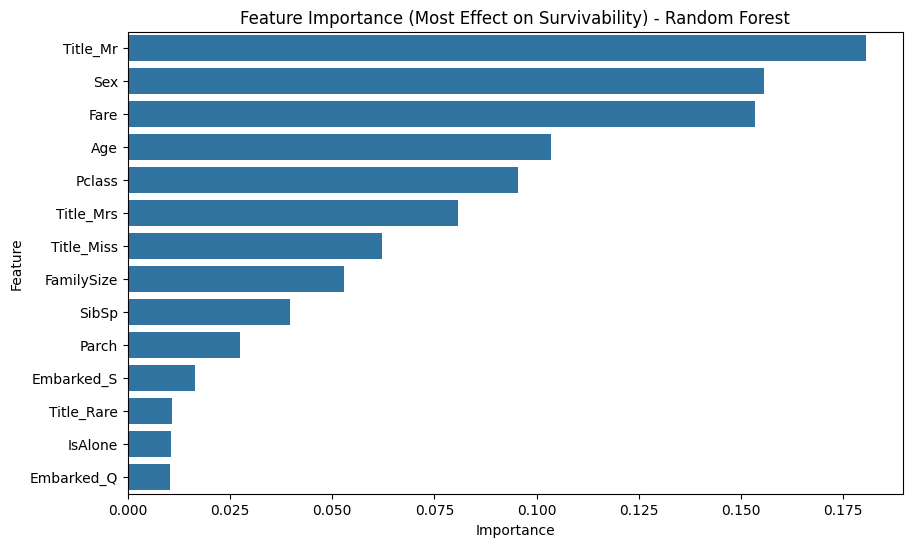

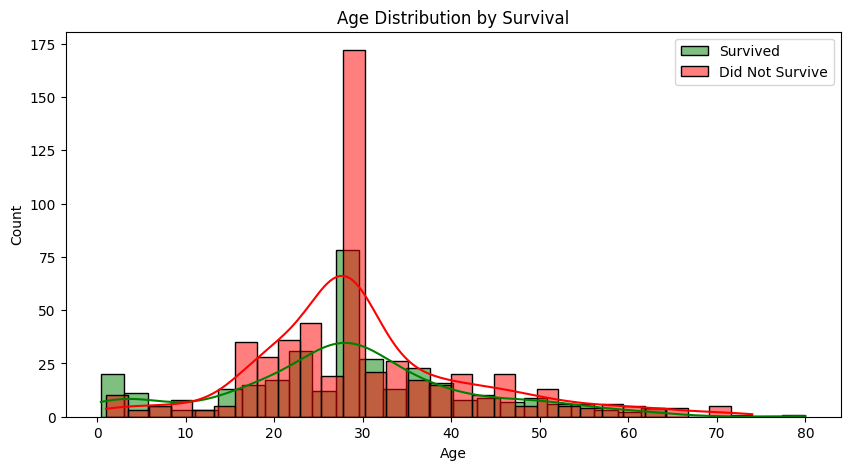

In [3]:


predictions = inference(test_X)

importances = model.feature_importances_
feat_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance (Most Effect on Survivability) - Random Forest")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(train[train['Survived']==1]['Age'], color='green', label='Survived', kde=True, bins=30)
sns.histplot(train[train['Survived']==0]['Age'], color='red', label='Did Not Survive', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()


submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)
